In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
adresses = [
    'YouTube_CSV_unfiltered/1_Wildlife/',
    'YouTube_CSV_unfiltered/2_Dynasties/',
    'YouTube_CSV_unfiltered/3_Big_Bang/',
    'YouTube_CSV_unfiltered/4_UK_National_Parks/',
    'YouTube_CSV_unfiltered/5_Mate_or_die_trying/',
    'YouTube_CSV_unfiltered/6_Where_Are_the_Stars/',
    'YouTube_CSV_unfiltered/7_Filming_Wildlife_Documentary/',
    'YouTube_CSV_unfiltered/8_Fireflies/',
    'YouTube_CSV_unfiltered/9_Seven_Worlds/',
    'YouTube_CSV_unfiltered/10_Uncover_Antarctica/',
    'YouTube_CSV_unfiltered/11_What_Sperm_Whales/',
    'YouTube_CSV_unfiltered/12_Everest_Biology/',
    'YouTube_CSV_unfiltered/13_Mapping_the_Highest_Peak/',
    'YouTube_CSV_unfiltered/14_Meet_the_Worlds_Tiniest_Trees/',
    'YouTube_CSV_unfiltered/15_What_To_Do/',
    'YouTube_CSV_unfiltered/16_Everest_Weather/',
    'YouTube_CSV_unfiltered/17_What_Mud_From_Glacial_Lakes/',
    'YouTube_CSV_unfiltered/18_Everest_Glaciology/',
    'YouTube_CSV_unfiltered/19_Plants_Dying/',
    'YouTube_CSV_unfiltered/20_Macaroni_Penguins/',
    'YouTube_CSV_unfiltered/21_Go_Inside_an_Antarctic_City/',
    'YouTube_CSV_unfiltered/22_Snow_Leopards/',
    'YouTube_CSV_unfiltered/23_Saving_the_Florida_Wildlife_Corridor/',
    'YouTube_CSV_unfiltered/24_Wolf_Pack_Takes_on_a_Polar_Bear/',
    'YouTube_CSV_unfiltered/25_Last_Wild_Places/'
]

In [3]:
def density_counter(quality, is_plotted):
    time_unit = 1

    d = {'Video_number': [], 'Density_burst': [], 'Density_throttling': []}
    for i in range(len(adresses)):
        data = pd.read_csv(adresses[i] + quality + '.csv')
        max_time = data['Time'].iat[-1] - data['Time'].iat[0]
        time_units = math.ceil(max_time / time_unit)
        lengths = [0] * time_units
        for index, row in data.iterrows():
            lengths[math.floor(row['Time'] / time_unit)] += row['Length']

        # получили массив длин, надо вычислить расположение первоначального пика
        # и вычислить Density_burst и Density_throttling
        
        if is_plotted == True:
            
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit

            plt.stairs(lengths, times, fill=True)
            plt.title(adresses[i] + '4K.csv')
            plt.xlabel('time')
            plt.show()

            
        difference_pos = 0
        
        # 40 -- 40 секунд, за которые точно успевает пройти burst
        burst_max_time = 40
        if time_units - 1 < 40:
            burst_max_time = time_units - 1
        
        # 1 способ -- если есть отрезок с нулевой передаваемой длиной
#         for j in range(burst_max_time // time_unit):
#             if (difference_pos == 0 and lengths[j + 1] == 0):
#                 difference_pos = j + 1

        # 2 способ -- если столбец отличается в 3 раза от следующего
#         if difference_pos == 0:
#             coeff = 3
#             for j in range(burst_max_time // time_unit):
#                 if lengths[j] != 0 and lengths[j + 1] != 0 and lengths[j] > lengths[j + 1] * coeff:
#                     difference_pos = j + 1
#                     coeff = lengths[j] / lengths[j + 1]
        
        # 3 способ -- поиск зоны с наибольшей разницей плотности
        if difference_pos == 0:
            difference = 0
            for j in range(1, time_units):
                first_sum = 0
                second_sum = 0
                for k in range(0, j):
                    first_sum += lengths[k]
                for l in range(j, time_units):
                    second_sum += lengths[l]
                if first_sum / j - second_sum / (time_units - j) > difference:
                    difference = first_sum / j - second_sum / (time_units - j)
                    difference_pos = j
        
        if is_plotted == True:
            print('difference_pos: ' + str(difference_pos))

        
        # Вычислили расположение первоначального пика, остались density_burst и density_throttling

        density_burst = 0
        density_throttling = 0
        for p in range(0, difference_pos):
            density_burst += lengths[p]
        for q in range(difference_pos, time_units):
            density_throttling += lengths[q]
        density_burst = density_burst / (difference_pos * time_unit)
        density_throttling = density_throttling / ((time_units - difference_pos) * time_unit)

        num_spaces = len(str(int(density_burst))) - len(str(int(density_throttling)))
        
        if is_plotted == True:
            print('density_burst:        ', density_burst)
            print('density_throttling:   ' + ' ' * num_spaces, density_throttling)

        d['Video_number'].append(i + 1)
        d['Density_burst'].append(density_burst)
        d['Density_throttling'].append(density_throttling)
        
    return d

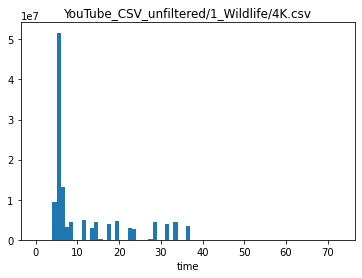

difference_pos: 7
density_burst:         10581978.57142857
density_throttling:      778436.9848484849


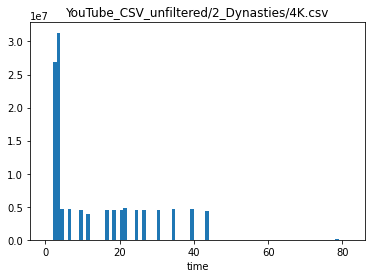

difference_pos: 4
density_burst:         14553254.0
density_throttling:      818585.7307692308


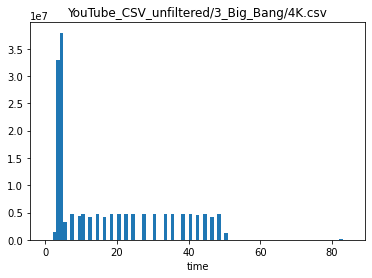

difference_pos: 5
density_burst:         14465293.2
density_throttling:     1205208.175


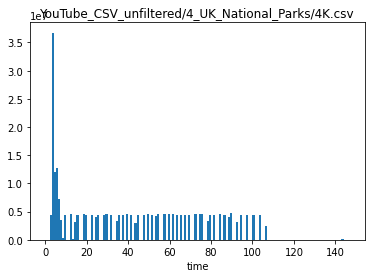

difference_pos: 6
density_burst:         10983138.666666666
density_throttling:     1508179.3475177304


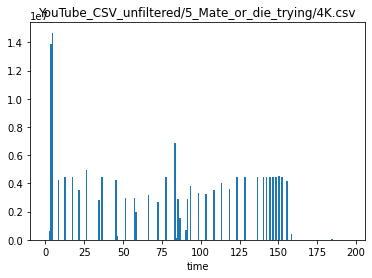

difference_pos: 5
density_burst:         5832414.6
density_throttling:     718760.3717277487


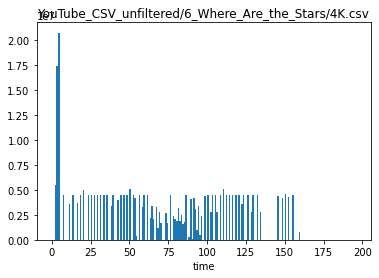

difference_pos: 5
density_burst:         8722681.4
density_throttling:    1485116.4869109949


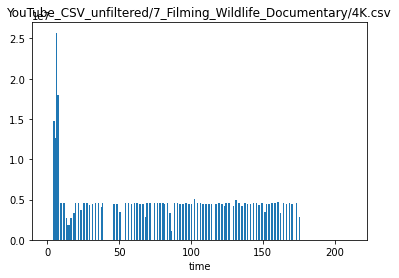

difference_pos: 8
density_burst:         8897259.25
density_throttling:    1726632.406862745


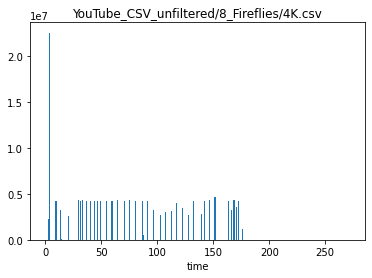

difference_pos: 4
density_burst:         6186599.75
density_throttling:     530561.2574626865


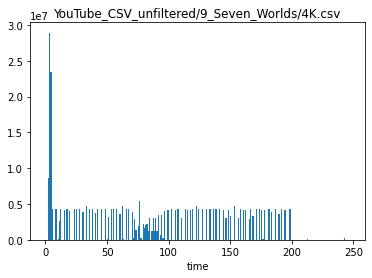

difference_pos: 5
density_burst:         12216608.6
density_throttling:     1327151.4256198348


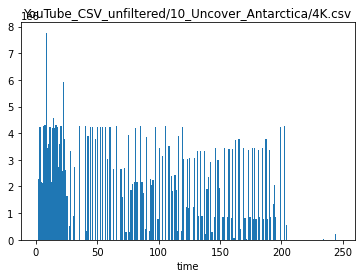

difference_pos: 24
density_burst:         3541744.2916666665
density_throttling:    1166251.3839285714


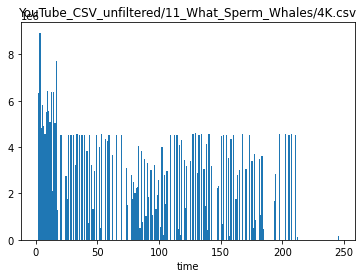

difference_pos: 17
density_burst:         5032270.235294118
density_throttling:    1440360.2652173913


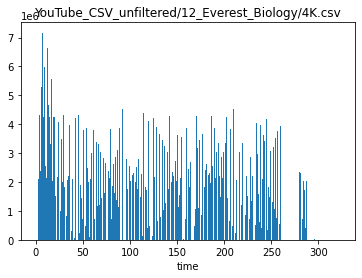

difference_pos: 17
density_burst:         3837671.470588235
density_throttling:    1424683.8562091503


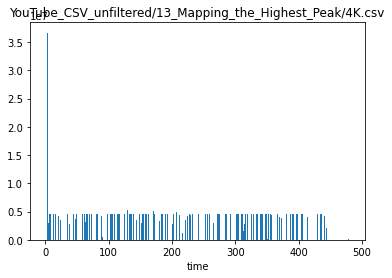

difference_pos: 4
density_burst:         17654013.25
density_throttling:     1567446.144654088


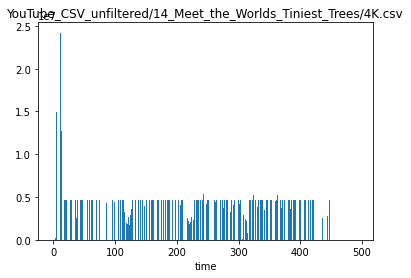

difference_pos: 6
density_burst:         6358138.666666667
density_throttling:    1898817.4887063655


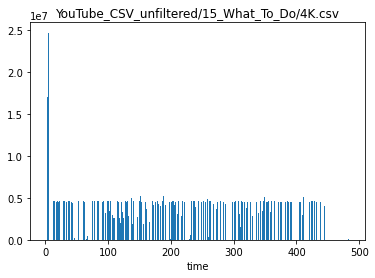

difference_pos: 5
density_burst:         11099070.4
density_throttling:     1725823.4625


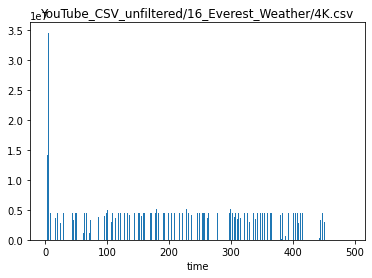

difference_pos: 6
density_burst:         10376912.833333334
density_throttling:     1250896.6358024692


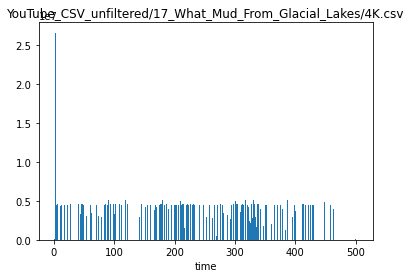

difference_pos: 4
density_burst:         13056432.75
density_throttling:     1691766.144


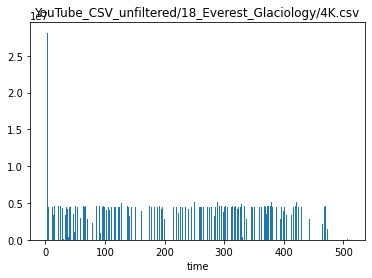

difference_pos: 5
density_burst:         10908459.8
density_throttling:     1460852.8418972332


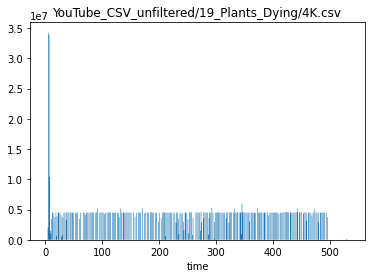

difference_pos: 8
density_burst:         10068636.5
density_throttling:     1936805.9146110057


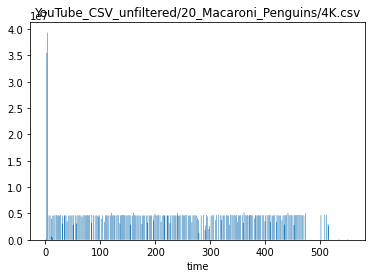

difference_pos: 4
density_burst:         18732332.5
density_throttling:     1826301.0945454545


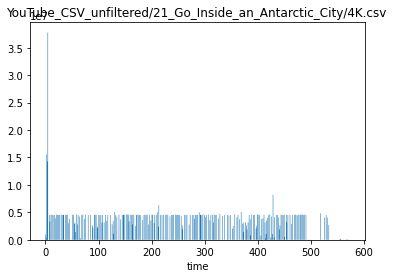

difference_pos: 5
density_burst:         13753526.8
density_throttling:     1557723.5193661973


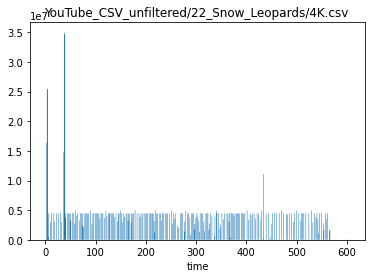

difference_pos: 5
density_burst:         13450591.0
density_throttling:     1618167.0915141432


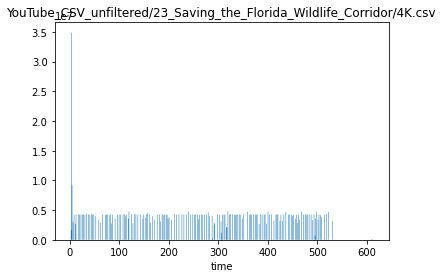

difference_pos: 5
density_burst:         9156463.8
density_throttling:    1067830.6836065573


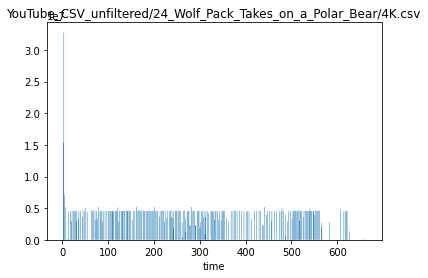

difference_pos: 4
density_burst:         12011739.0
density_throttling:     1442586.4393939395


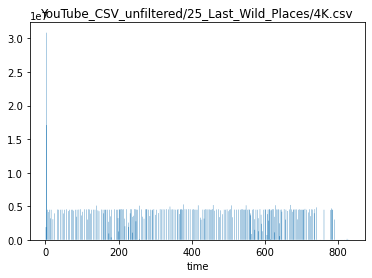

difference_pos: 4
density_burst:         12461342.0
density_throttling:     1186339.0760869565


In [4]:
d = density_counter('4K', True)

In [5]:
pd.DataFrame(data=d).head(5)

,Video_number,Density_burst,Density_throttling
0,1,1.058198e+07,7.784370e+05
1,2,1.455325e+07,8.185857e+05
2,3,1.446529e+07,1.205208e+06
3,4,1.098314e+07,1.508179e+06
4,5,5.832415e+06,7.187604e+05


In [6]:
df_4K = pd.DataFrame(data=density_counter('4K', False))
df_4K.head(5)

,Video_number,Density_burst,Density_throttling
0,1,1.058198e+07,7.784370e+05
1,2,1.455325e+07,8.185857e+05
2,3,1.446529e+07,1.205208e+06
3,4,1.098314e+07,1.508179e+06
4,5,5.832415e+06,7.187604e+05


In [7]:
df_1440 = pd.DataFrame(data=density_counter('1440', False))
df_1440.head(5)

,Video_number,Density_burst,Density_throttling
0,1,7.919733e+06,110452.522388
1,2,1.556401e+07,27390.000000
2,3,9.475006e+06,122758.493671
3,4,1.176897e+07,371440.323944
4,5,3.809073e+06,128558.709845


In [8]:
df_1080 = pd.DataFrame(data=density_counter('1080', False))
df_1080.head(5)

,Video_number,Density_burst,Density_throttling
0,1,5194077.50,2497.492537
1,2,6033874.00,3008.397436
2,3,6434219.25,1258.555556
3,4,9033000.00,5132.138889
4,5,11966268.00,52866.470297


In [9]:
df_720 = pd.DataFrame(data=density_counter('720', False))
df_720.head(5)

,Video_number,Density_burst,Density_throttling
0,1,3.968812e+06,1613.367647
1,2,3.466274e+06,1866.610390
2,3,3.677756e+06,1171.975610
3,4,4.141557e+06,1974.602837
4,5,3.783875e+06,14941.412060


In [10]:
df_480 = pd.DataFrame(data=density_counter('480', False))
df_480.head(5)

,Video_number,Density_burst,Density_throttling
0,1,2.139627e+06,1048.794118
1,2,1.894932e+06,1412.545455
2,3,2.482623e+06,1250.938272
3,4,2.970999e+06,4375.307692
4,5,1.674157e+06,14180.735751


In [11]:
df_360 = pd.DataFrame(data=density_counter('360', False))
df_360.head(5)

,Video_number,Density_burst,Density_throttling
0,1,1.318803e+06,1061.088235
1,2,1.219965e+06,1976.430380
2,3,1.574769e+06,1218.567901
3,4,1.504699e+06,2254.655172
4,5,1.194624e+06,12044.380208


In [12]:
df_4K["Quality"] = "2160"
df_1440["Quality"] = "1440"
df_1080["Quality"] = "1080"
df_720["Quality"] = "720"
df_480["Quality"] = "480"
df_360["Quality"] = "360"

In [13]:
data = pd.concat([df_4K, df_1440, df_1080, df_720, df_480, df_360], ignore_index=True)
data

,Video_number,Density_burst,Density_throttling,Quality
0,1,1.058198e+07,7.784370e+05,2160
1,2,1.455325e+07,8.185857e+05,2160
2,3,1.446529e+07,1.205208e+06,2160
3,4,1.098314e+07,1.508179e+06,2160
4,5,5.832415e+06,7.187604e+05,2160
...,...,...,...,...
145,21,2.051503e+06,4.545315e+04,360
146,22,1.284383e+06,3.662261e+04,360
147,23,1.070837e+06,2.868816e+04,360
148,24,1.415124e+06,3.507011e+04,360


In [14]:
import os   
data.to_csv('data_unfiltered.csv')  